In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import math

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 1000)
parkingdata.size

13000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
2713308,The Mac,LA TROBE STREET,ELIZABETH STREET,SWANSTON STREET,4,3765S,14/12/2011 06:09:58 PM,14/12/2011 06:12:30 PM,152,1P TKT A M-F 9:30-19:30,0,856,2166
6712858,Queensberry,QUEENSBERRY STREET,ERROL STREET,LEVESON STREET,1,C7758,16/04/2012 04:22:40 PM,16/04/2012 04:42:00 PM,1160,1P MTR M-F 7:30-18:30,0,1175,5326
2796688,Courtney,O'CONNELL STREET,PEEL STREET,QUEENSBERRY STREET,5,5133W,16/12/2011 05:14:56 PM,16/12/2011 05:40:25 PM,1529,1/2P A RPE M-F 7:30-18:30,0,1062,4870
1133661,County,LONSDALE STREET,KING STREET,WILLIAM STREET,1,C3230,02/11/2011 09:11:55 AM,02/11/2011 09:13:17 AM,82,1P MTR M-SAT 7:30-19:30,0,894,1749
1945960,Regency,SPRING STREET,Lt LONSDALE STREET,LONSDALE STREET,1,C132,23/11/2011 07:47:18 PM,23/11/2011 08:30:00 PM,2562,2P MTR M-SAT 7:30-20:30,0,1288,106


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
7994504,Victoria Market,VICTORIA STREET,O'CONNELL STREET,ELIZABETH STREET,3,7552N,26/05/2012 12:45:24 PM,26/05/2012 01:17:34 PM,1930,1/2P MTR M-SAT 7:30-19:30,0,1381,3892
7059015,The Mac,FRANKLIN STREET,ELIZABETH STREET,SWANSTON STREET,3,6536N,27/04/2012 03:58:58 PM,27/04/2012 04:39:52 PM,2454,1/2P MTR M-SAT 7:30-19:30,1,681,2855
1472050,The Mac,FRANKLIN STREET,ELIZABETH STREET,SWANSTON STREET,3,6536N,10/11/2011 07:22:47 PM,10/11/2011 07:30:00 PM,433,1/2P MTR M-SAT 7:30-19:30,0,681,2855
2983618,Queensberry,CHETWYND STREET,VICTORIA STREET,STANLEY STREET,2,6044E,22/12/2011 08:30:31 AM,22/12/2011 10:27:44 AM,7033,2P RPA M-F 7:30-18:30,0,192,2733
4148440,Regency,SPRING STREET,Lt LONSDALE STREET,LONSDALE STREET,1,C120,28/01/2012 07:36:34 PM,28/01/2012 08:30:00 PM,3206,2P MTR M-SAT 7:30-20:30,0,1288,102


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        94
Princes Theatre    77
Regency            71
Southbank          66
Victoria Market    65
The Mac            61
Hyatt              60
County             51
Rialto             49
City Square        43
Titles             42
Magistrates        42
Banks              41
Chinatown          40
Courtney           39
Hardware           35
Spencer            34
RACV               28
Jolimont           24
Supreme            20
Tavistock          13
Docklands           5
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
2713308,THE MAC,LA TROBE STREET,ELIZABETH STREET,SWANSTON STREET,4,3765S,14/12/2011 06:09:58 PM,14/12/2011 06:12:30 PM,152,1P TKT A M-F 9:30-19:30,0,856,2166
6712858,QUEENSBERRY,QUEENSBERRY STREET,ERROL STREET,LEVESON STREET,1,C7758,16/04/2012 04:22:40 PM,16/04/2012 04:42:00 PM,1160,1P MTR M-F 7:30-18:30,0,1175,5326
2796688,COURTNEY,O'CONNELL STREET,PEEL STREET,QUEENSBERRY STREET,5,5133W,16/12/2011 05:14:56 PM,16/12/2011 05:40:25 PM,1529,1/2P A RPE M-F 7:30-18:30,0,1062,4870
1133661,COUNTY,LONSDALE STREET,KING STREET,WILLIAM STREET,1,C3230,02/11/2011 09:11:55 AM,02/11/2011 09:13:17 AM,82,1P MTR M-SAT 7:30-19:30,0,894,1749
1945960,REGENCY,SPRING STREET,LT LONSDALE STREET,LONSDALE STREET,1,C132,23/11/2011 07:47:18 PM,23/11/2011 08:30:00 PM,2562,2P MTR M-SAT 7:30-20:30,0,1288,106


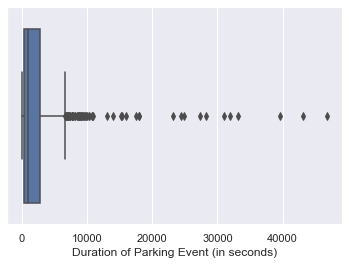

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])


In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET        111
QUEEN STREET            73
EXHIBITION STREET       62
COLLINS STREET          54
FRANKLIN STREET         54
ELIZABETH STREET        52
RUSSELL STREET          49
LA TROBE STREET         47
KING STREET             41
BOURKE STREET           38
LT LONSDALE STREET      35
SPRING STREET           30
LT COLLINS STREET       28
FLINDERS LANE           26
ERROL STREET            19
LT BOURKE STREET        17
VICTORIA STREET         15
SPENCER STREET          15
WILLIAM STREET          15
A'BECKETT STREET        15
FLINDERS STREET         15
COVENTRY STREET         14
DORCAS STREET           14
QUEENSBERRY STREET      13
GRANT STREET            11
COBDEN STREET            9
CLARENDON STREET         9
HOWARD STREET            8
CURZON STREET            8
THERRY STREET            7
CHETWYND STREET          7
O'CONNELL STREET         7
SWANSTON STREET          6
STURT STREET             6
KAVANAGH STREET          5
LEVESON STREET           5
SOUTHBANK BOULEVARD      5
C

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            82
QUEEN STREET           81
WILLIAM STREET         68
QUEENSBERRY STREET     62
SPENCER STREET         53
LT LONSDALE STREET     52
EXHIBITION STREET      52
RUSSELL STREET         51
SWANSTON STREET        45
LONSDALE STREET        37
LT COLLINS STREET      36
COLLINS STREET         32
BOURKE STREET          27
ELIZABETH STREET       26
VICTORIA STREET        26
LT BOURKE STREET       26
FLINDERS LANE          23
THERRY STREET          17
LA TROBE STREET        16
FLINDERS STREET        13
FRANKLIN STREET        13
KINGS WAY              13
DODDS STREET           13
SOUTHBANK BOULEVARD    10
WELLS STREET            9
ERROL STREET            9
O'CONNELL STREET        8
PEEL STREET             8
A'BECKETT STREET        8
PELHAM STREET           7
STURT STREET            6
WILLAM STREET           5
HOWARD STREET           5
VICTORIA PARADE         5
ALBERT STREET           5
WALSH STREET            4
BALSTON STREET          4
CITY ROAD               4
BATMAN STREE

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

ELIZABETH STREET      82
WILLIAM STREET        77
VICTORIA STREET       73
QUEEN STREET          72
SPRING STREET         53
KING STREET           53
LONSDALE STREET       53
EXHIBITION STREET     51
FLINDERS LANE         45
LT BOURKE STREET      37
RUSSELL STREET        36
COLLINS STREET        36
LT COLLINS STREET     27
SWANSTON STREET       26
BOURKE STREET         26
FLINDERS STREET       23
LT LONSDALE STREET    20
DODDS STREET          20
LA TROBE STREET       20
FRANKLIN STREET       17
QUEENSBERRY STREET    12
WELLS STREET           9
ST KILDA ROAD          9
LEVESON STREET         9
ELM STREET             8
LANSDOWNE STREET       8
A'BECKETT STREET       7
MILES STREET           7
THERRY STREET          7
HAWKE STREET           6
DUDLEY STREET          5
WALSH STREET           5
POWER STREET           5
STURT STREET           5
CAPEL STREET           5
O'CONNELL STREET       4
JEFFCOTT STREET        4
GEORGE STREET          3
STANLEY STREET         3
FAWKNER STREET         3


In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
2713308,THE MAC,LA TROBE STREET,ELIZABETH STREET,SWANSTON STREET,4,3765S,2011-12-14 18:09:58,2011-12-14 18:12:30,152,1P TKT A M-F 9:30-19:30,0,856,2166
6712858,QUEENSBERRY,QUEENSBERRY STREET,ERROL STREET,LEVESON STREET,1,C7758,2012-04-16 16:22:40,2012-04-16 16:42:00,1160,1P MTR M-F 7:30-18:30,0,1175,5326
2796688,COURTNEY,O'CONNELL STREET,PEEL STREET,QUEENSBERRY STREET,5,5133W,2011-12-16 17:14:56,2011-12-16 17:40:25,1529,1/2P A RPE M-F 7:30-18:30,0,1062,4870
1133661,COUNTY,LONSDALE STREET,KING STREET,WILLIAM STREET,1,C3230,2011-02-11 09:11:55,2011-02-11 09:13:17,82,1P MTR M-SAT 7:30-19:30,0,894,1749
1945960,REGENCY,SPRING STREET,LT LONSDALE STREET,LONSDALE STREET,1,C132,2011-11-23 19:47:18,2011-11-23 20:30:00,2562,2P MTR M-SAT 7:30-20:30,0,1288,106


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
7994504,VICTORIA MARKET,VICTORIA STREET,O'CONNELL STREET,ELIZABETH STREET,3,7552N,2012-05-26 12:45:24,2012-05-26 13:17:34,1930,1/2P MTR M-SAT 7:30-19:30,0,1381,3892
7059015,THE MAC,FRANKLIN STREET,ELIZABETH STREET,SWANSTON STREET,3,6536N,2012-04-27 15:58:58,2012-04-27 16:39:52,2454,1/2P MTR M-SAT 7:30-19:30,1,681,2855
1472050,THE MAC,FRANKLIN STREET,ELIZABETH STREET,SWANSTON STREET,3,6536N,2011-10-11 19:22:47,2011-10-11 19:30:00,433,1/2P MTR M-SAT 7:30-19:30,0,681,2855
2983618,QUEENSBERRY,CHETWYND STREET,VICTORIA STREET,STANLEY STREET,2,6044E,2011-12-22 08:30:31,2011-12-22 10:27:44,7033,2P RPA M-F 7:30-18:30,0,192,2733
4148440,REGENCY,SPRING STREET,LT LONSDALE STREET,LONSDALE STREET,1,C120,2012-01-28 19:36:34,2012-01-28 20:30:00,3206,2P MTR M-SAT 7:30-20:30,0,1288,102


### KNN Classification Model on Predicitive Analytics question 2

In [19]:
#Target field identification
duration = parkingdata['Duration of Parking Event (in seconds)'].copy()

print('Minimum parking duration (seconds): ' + str(duration.min()))
print('Maximum parking duration (seconds): ' + str(duration.max()))
print('\nMinimum parking duration (hour): ' + str(duration.min()/3600))
print('Maximum parking duration (hour): ' + str(duration.max()/3600))
print('\nMinimum parking duration is under [' + str(math.trunc(duration.min()/3600) + 1) + '] hours')
print('Maximum parking duration is under [' + str(math.trunc(duration.max()/3600) + 1) + '] hours')

durList = []
static = 1
df = pd.DataFrame()

for record in duration.values:
    hour = 3600
    index = 0
    while static == 1:
        if record < hour:
#             print("\nDuration in seconds: " + str(record))
            data = math.trunc(record/3600) + 1
            durList.append(data)
#             print("Duration is under " + str(data) + " hours")
            break
        else:
            hour += 3600

df.insert(0, 'Duration (Hours)', durList, True)
target = df['Duration (Hours)']
target.head(10)

Minimum parking duration (seconds): 61
Maximum parking duration (seconds): 46792

Minimum parking duration (hour): 0.016944444444444446
Maximum parking duration (hour): 12.997777777777777

Minimum parking duration is under [1] hours
Maximum parking duration is under [13] hours


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    5
8    3
9    1
Name: Duration (Hours), dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('In Violation?', axis = 1, inplace = True)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['In Violation?'] = parkingdata['In Violation?']
features['Side Of Street'] = parkingdata['Side Of Street']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Sign,In Violation?,Side Of Street,Street ID,Device ID,Arrival Hour,Departure Hour
2713308,0,0,0,0,0,0,4,856,2166,18,18
6712858,1,1,1,1,1,0,1,1175,5326,16,16
2796688,2,2,2,2,2,0,5,1062,4870,17,17
1133661,3,3,3,3,3,0,1,894,1749,9,9
1945960,4,4,4,4,4,0,1,1288,106,19,20
779770,5,5,5,5,5,0,2,647,202,17,17
1700291,6,6,6,6,6,0,3,597,4454,10,11
547819,6,7,7,7,7,1,3,728,4659,10,14
11734292,2,8,8,8,8,1,2,627,5966,7,10
7524957,6,7,7,7,7,0,3,728,4649,10,10


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
params_KNN = {'n_neighbors': list(range(1, 10)), 
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': list(range(10, 50, 5)),
              'p': [1, 2, 5]
             }

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 2, 
                                    n_repeats = 1, 
                                    random_state = 4)

gs_KNN = GridSearchCV(estimator = KNeighborsClassifier(), 
                      param_grid = params_KNN, 
                      cv = cv_method,
                      verbose = 1,
                      scoring = 'accuracy', 
                      return_train_score = True,
                      n_jobs = -1)

In [23]:
#Fit the model with the dataset
bestModel = gs_KNN.fit(features, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


C:\Users\drago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 512 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 1026 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 1944 tasks      | elapsed:   42.4s
[Parallel(n_jobs=-1)]: Done 2946 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:  1.7min finished


In [24]:
#Find the best values for the  parameters of the model (Standard output)
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 8,
 'p': 1,
 'weights': 'uniform'}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_n = bestModel.best_estimator_.get_params()['n_neighbors']
best_w = bestModel.best_estimator_.get_params()['weights']
best_a =  bestModel.best_estimator_.get_params()['algorithm']
best_l =  bestModel.best_estimator_.get_params()['leaf_size']
best_p =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n)
print('Best weights:', best_w)
print('Best algorithm:', best_a)
print('Best leaf_size:', best_l)
print('Best p:', best_p)

Best n_neighbors: 8
Best weights: uniform
Best algorithm: auto
Best leaf_size: 10
Best p: 1


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.711
1,auto,10,1,1,distance,0.711
2,auto,10,1,2,uniform,0.714
3,auto,10,1,2,distance,0.714
4,auto,10,1,5,uniform,0.716
5,auto,10,1,5,distance,0.716
6,auto,10,2,1,uniform,0.800
7,auto,10,2,1,distance,0.715
8,auto,10,2,2,uniform,0.801
9,auto,10,2,2,distance,0.714


In [27]:
#Define model with the optimal parameter values
knn = metric = KNeighborsClassifier(n_neighbors = best_n, 
                               weights = best_w, 
                               algorithm = best_a, 
                               leaf_size = best_l, 
                               p = best_p)

In [28]:
# Hill climbing w/ KNN
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = knn.fit(x_train, y_train)
    cur_Score = knn.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.8
Score with 2 selected features: 0.81
Score with 3 selected features: 0.81
Score with 4 selected features: 0.81
Score with 5 selected features: 0.81
Score with 6 selected features: 0.815
Score with 7 selected features: 0.815

Indexs of the desired features
[2, 3, 9, 6, 7, 10, 5]


In [29]:
#Create new dataframe from hill climbing output
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 1,Between Street 2,Arrival Hour,Side Of Street,Street ID,Departure Hour,In Violation?
2713308,0,0,18,4,856,18,0
6712858,1,1,16,1,1175,16,0
2796688,2,2,17,5,1062,17,0
1133661,3,3,9,1,894,9,0
1945960,4,4,19,1,1288,20,0
779770,5,5,17,2,647,17,0
1700291,6,6,10,3,597,11,0
547819,7,7,10,3,728,14,1
11734292,8,8,7,2,627,10,1
7524957,7,7,10,3,728,10,0


In [30]:
#Fit the model with the dataset (New Hill Climbing Features)
bestModel = gs_KNN.fit(features_hc, target)

Fitting 2 folds for each of 1728 candidates, totalling 3456 fits


C:\Users\drago\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:  1.4min finished


In [31]:
#Find the best values for the  parameters of the model (Standard output) AFTER HILL CLIMBING
gs_KNN.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 9,
 'p': 1,
 'weights': 'uniform'}

In [32]:
#Find the best values for the  parameters of the model (Formatted output) AFTER HILL CLIMBING
best_n_hc = bestModel.best_estimator_.get_params()['n_neighbors']
best_w_hc = bestModel.best_estimator_.get_params()['weights']
best_a_hc =  bestModel.best_estimator_.get_params()['algorithm']
best_l_hc =  bestModel.best_estimator_.get_params()['leaf_size']
best_p_hc =  bestModel.best_estimator_.get_params()['p']

print('Best n_neighbors:', best_n_hc)
print('Best weights:', best_w_hc)
print('Best algorithm:', best_a_hc)
print('Best leaf_size:', best_l_hc)
print('Best p:', best_p_hc)

Best n_neighbors: 9
Best weights: uniform
Best algorithm: auto
Best leaf_size: 10
Best p: 1


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset AFTER HILL CLIMBING
results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN

,algorithm,leaf_size,n_neighbors,p,weights,test_score
0,auto,10,1,1,uniform,0.721
1,auto,10,1,1,distance,0.721
2,auto,10,1,2,uniform,0.718
3,auto,10,1,2,distance,0.718
4,auto,10,1,5,uniform,0.726
5,auto,10,1,5,distance,0.726
6,auto,10,2,1,uniform,0.808
7,auto,10,2,1,distance,0.737
8,auto,10,2,2,uniform,0.806
9,auto,10,2,2,distance,0.723


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
knn = metric = KNeighborsClassifier(n_neighbors = best_n_hc, 
                               weights = best_w_hc, 
                               algorithm = best_a_hc, 
                               leaf_size = best_l_hc, 
                               p = best_p_hc)

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
knn.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = knn.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(knn.score(x_test, y_test)))

Confusion Matrix
[[409   3   0   0   0   0   0   0   0]
 [ 57   3   0   0   0   0   0   0   0]
 [ 20   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   0   0]]

[Train/test split] score: 0.82400


In [36]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    knn.fit(x_train, y_train)
    kFoldTotal += knn.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

[fold 0] score: 0.84500
[fold 1] score: 0.78000
[fold 2] score: 0.85500
[fold 3] score: 0.81000
[fold 4] score: 0.81500

KNN mean score [5 folds] = 0.821
